<a href="https://colab.research.google.com/github/David-Smirnoff/clustering/blob/main/Annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from cmath import exp, pi, sin
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import random
from math import sin, cos, pi, sqrt, exp
from numpy.fft import fft, ifft
from numpy import array
from numpy.linalg import norm
import functools,operator,os,random,copy
from random import gauss

#Datos
T=np.arange(0,500,0.1) #Tiempo, data eje x
dt=T[1]-T[0] #Intervalo de tiempo
S=625.554*np.exp(-0.541655*T)-24.841  #Experimental Signal
n=len(T)

# plt.plot(T,S)
# plt.show()


In [ ]:
#Generation of theorical Signal
def E(a,b,c,d):
  S_model=[]
  for t in T:
      S_model.append(a*exp(-b*t)+c)
  return norm(S-S_model)

In [ ]:
#Parametros de control
Temp_ini=0.00045; Temp_final=0.4*10**-6; Ebest=500; kb=1*10**5; fd=5000   #factor de disminución de la temperatura
alim=[0,1000]; blim=[0,10]; clim=[-150,150];dlim=[-1,1]
rep=1 #repetición del annealing

nmax=round(np.log(Temp_final/Temp_ini)/np.log(1-1/fd))  #numero de iteraciones
abest=(alim[0]+alim[1])/2 ; bbest=(blim[0]+blim[1])/2; cbest=(clim[0]+clim[1])/2; dbest=(dlim[0]+dlim[1])/2
Energ_final=np.zeros(rep) 
amejores=np.zeros(rep); bmejores=np.zeros(rep); cmejores=np.zeros(rep)


35124


In [ ]:
print (nmax)
for r in range(1,rep+1):     
  acurr=abest; bcurr=bbest; ccurr=cbest; dcurr=dbest
  Temp=Temp_ini   
  nitera=1
  nacept=0
  energia=[Ebest]

  while Temp>Temp_final:
      sigma_unif=(30*Ebest)*Temp**(3/4)/(r)
      sigma_gauss=(30000*Temp**(6/5))/(r)      
      
      anew=acurr*(1+random.gauss(0,sigma_gauss))+np.random.uniform(-sigma_unif,sigma_unif)
      while anew<alim[0] or anew>alim[1]:
          anew=acurr*(1+random.gauss(0,sigma_gauss))+np.random.uniform(-sigma_unif,sigma_unif)
      bnew= bcurr*(1+random.gauss(0,sigma_gauss))+np.random.uniform(-sigma_unif,sigma_unif)
      while bnew<blim[0] or bnew>blim[1]:
          bnew= bcurr*(1+random.gauss(0,sigma_gauss))+np.random.uniform(-sigma_unif,sigma_unif)
      cnew= ccurr*(1+random.gauss(0,sigma_gauss))+np.random.uniform(-sigma_unif,sigma_unif)
      while cnew<clim[0] or cnew>clim[1]:
          cnew= ccurr*(1+random.gauss(0,sigma_gauss))+np.random.uniform(-sigma_unif,sigma_unif)
      dnew= dcurr*(1+random.gauss(0,sigma_gauss))+np.random.uniform(-sigma_unif,sigma_unif)*0
      while dnew<dlim[0] or dnew>dlim[1]:
          dnew= dcurr*(1+random.gauss(0,sigma_gauss))+np.random.uniform(-sigma_unif,sigma_unif)*0
      
      E1=E(anew,bnew,cnew,dnew)
      E0=E(acurr,bcurr,ccurr,dcurr)
      energia.append(E1)

      if nitera==1:
          print(sigma_gauss, sigma_unif)
          print ('comienza',r,anew,bnew,cnew,dnew,E1)

      dE=E1-E0  
      e=dE/(kb*Temp)
      if e>20:
          e=20
      if e<-20:
          e=-20
      p=exp(-e)

      if nitera%1000==0:
          print(nitera,anew,bnew,cnew,dnew, E1,sigma_gauss, sigma_unif)
      u=np.random.uniform(0,1)
      if p>u: 
          acurr=anew; bcurr=bnew; ccurr=cnew; dcurr=dnew
          if E1<Ebest:
              abest=anew; bbest=bnew; cbest=cnew; dbest=dnew
              Ebest=E1
              nacept=nacept+1
              print('nmax###',nmax,'nitera', nitera,'nacept',nacept,abest,bbest,cbest,Ebest)
              
      Temp=Temp*(1-1/(fd)); nitera=nitera+1
      if nitera%5000==0:
        print('nitera', nitera,nmax,'mejor hasta ahora',abest,bbest,cbest,dbest,'E',Ebest,'sigma_unif',sigma_unif,'sigma_gauss',sigma_gauss)
  print('##############Termina','a b c d E',abest,bbest,cbest,dbest,Ebest,nacept)
  
  Energ_final[r-1]=Ebest; amejores[r-1]=abest; bmejores[r-1]=bbest; cmejores[r-1]=cbest
  print(Energ_final,amejores,bmejores,cmejores)

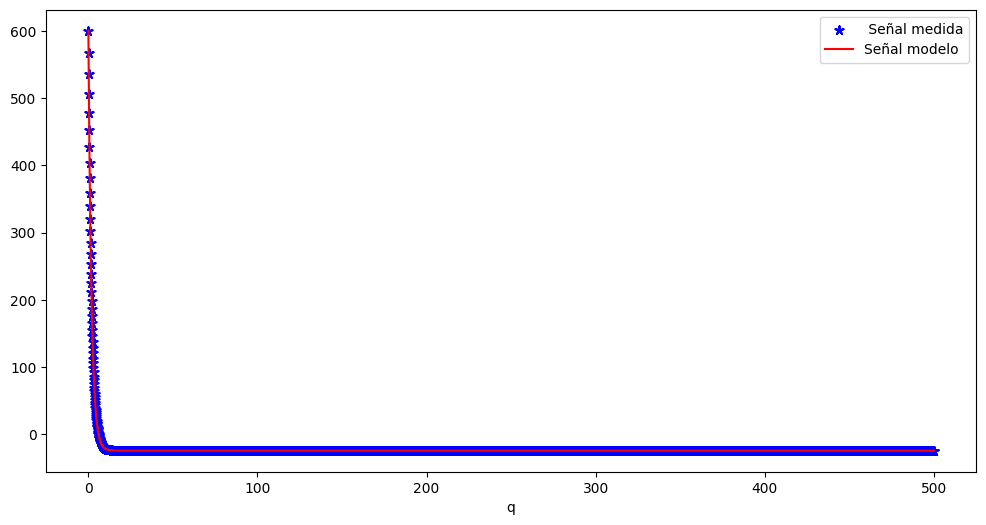

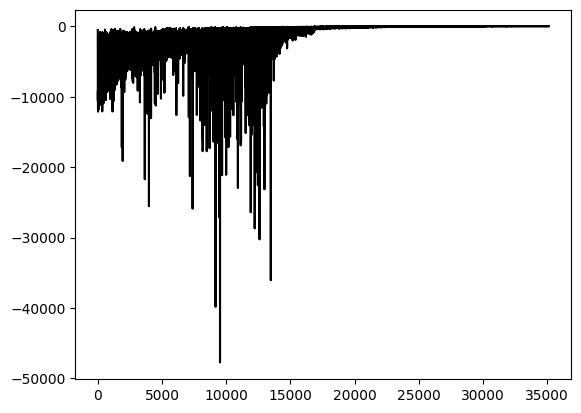

In [ ]:
#abest=2; bbest=0.5; cbest=10 ; dbest=0
S_model=[]
for t in T:
      S_model.append(abest*exp(-bbest*t)+cbest)
 
energia= np.array(energia)
m=len(energia)
m=np.arange(0, m, 1)
plt.figure(figsize = (12, 6))
plt.scatter(T,S,label=" Señal medida",color='b',marker=(5, 2)) 
plt.plot(T,S_model,label="Señal modelo",color='r',marker=',') 


plt.xlabel("q")
plt.legend()
plt.show(block=True)
plt.pause(1)
plt.close()

plt.plot(m,-energia,label="energia",color='k',marker=',') 
plt.show()
